In [1]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score, roc_curve, auc, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import math
import joypy
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.feature_selection import SelectFromModel
from datetime import datetime
import matplotlib.ticker as ticker
from matplotlib.legend_handler import HandlerLine2D
#import ray 


from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, precision_recall_curve, precision_recall_fscore_support
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA


# py -m pip install matplotlib

In [1]:
df = pd.read_csv('df_private.txt', sep="\t")

NameError: name 'pd' is not defined

In [3]:
X = df.drop(columns=['Churn']) 
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_ht, X_test_ht, y_train_ht, y_test_ht = train_test_split(X_train, y_train, stratify=y_train, test_size=0.9, random_state=42)

In [7]:
svc = SVC(kernel="rbf",C=1)

rfecv = RFECV(estimator=svc, step=2, cv=5, scoring=f1_scorer)
rfecv.fit(X_train, y_train)

ValueError: when `importance_getter=='auto'`, the underlying estimator SVC should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [8]:
svm = SVC(kernel='rbf', C=1, gamma='scale')

# RFE model
selector = RFE(svm, n_features_to_select=15, step=1)
selector = selector.fit(X_train_ht, y_train_ht)

# Selected Features
selected_features = selector.support_
print("Selected features:", selected_features)

ValueError: when `importance_getter=='auto'`, the underlying estimator SVC should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [5]:
df_private = pd.read_csv('df_private_dummies.txt', sep="\t")

In [6]:
f1_scorer = make_scorer(f1_score, greater_is_better = True)

In [7]:
X = df_private.drop(columns=['Churn']) 
y = df_private['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_ht, X_test_ht, y_train_ht, y_test_ht = train_test_split(X_train, y_train, stratify=y_train, test_size=0.9, random_state=42)

In [ ]:
X_train_ht.info()

In [6]:
df_enn = pd.read_csv('train_data_enn.txt', sep='\t')

X_train_enn = df_enn.drop('Churn', axis=1)  
y_train_enn = df_enn['Churn']              

X_train_enn_ht, X_test_enn_ht, y_train_enn_ht, y_test_enn_ht = train_test_split(X_train_enn, y_train_enn, stratify=y_train_enn, test_size=0.9, random_state=42)

In [11]:
#C_range = [2**k for k in range(2, 15)]  # Creates 13 points from 10^-3 to 10^3
# gamma_range = np.logspace(-15, 3, 18) 
#gamma_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10] # Same for gamma


C_range = np.logspace(-2, 10, 12)   

#gamma_range = np.logspace(-13, 3, 25)  

param_dist={'C': C_range,
                         'gamma':['scale', 'auto'],
                         'kernel': ['rbf']}

svc = SVC(kernel='rbf')

random_search = RandomizedSearchCV(
    svc,
    param_distributions=param_dist,
    n_iter=9,   
    scoring=f1_scorer,
    cv=5,        
    random_state=42,
    verbose=2
)

random_search.fit(X_train_enn_ht, y_train_enn_ht)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# 0.601750729821396 su c=512

# Best parameters: {'kernel': 'rbf', 'gamma': 1.0, 'C': 1024}
# Best score: 0.11234206842453412

#Best score: 0.5233448077817211 C_range = np.logspace(-2, 5, 5)  

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......C=12915496650148.826, gamma=auto, kernel=rbf; total time= 3.0min
[CV] END .......C=12915496650148.826, gamma=auto, kernel=rbf; total time=10.1min
[CV] END .......C=12915496650148.826, gamma=auto, kernel=rbf; total time= 5.9min
[CV] END .......C=12915496650148.826, gamma=auto, kernel=rbf; total time= 5.8min
[CV] END .......C=12915496650148.826, gamma=auto, kernel=rbf; total time= 3.8min
[CV] END .......C=166810053720.00558, gamma=auto, kernel=rbf; total time= 2.5min
[CV] END .......C=166810053720.00558, gamma=auto,

In [22]:
#C_range = [2**k for k in range(2, 15)]  # Creates 13 points from 10^-3 to 10^3
# gamma_range = np.logspace(-15, 3, 18) 
#gamma_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10] # Same for gamma


C_range = [2**k for k in range(2, 15)]  

gamma_range = np.logspace(-9, 3, 13)  

param_dist={'C': C_range,
                         'gamma': gamma_range,
                         'kernel': ['rbf']}

svc = SVC(kernel='rbf')

random_search = RandomizedSearchCV(
    svc,
    param_distributions=param_dist,
    n_iter=9,   
    scoring=f1_scorer,
    cv=5,        
    random_state=42,
    verbose=2
)

random_search.fit(X_train_ht, y_train_ht)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# 0.601750729821396 su c=512

# Best parameters: {'kernel': 'rbf', 'gamma': 1.0, 'C': 1024}
# Best score: 0.11234206842453412

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................C=4096, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END ......................C=4096, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END ......................C=4096, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END ......................C=4096, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ......................C=4096, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ......................C=16, gamma=1e-05, kernel=rbf; total time=   0.1s
[CV] END ......................C=16, gamma=1e-05, kernel=rbf; total time=   0.1s
[CV] END ......................C=16, gamma=1e-05, kernel=rbf; total time=   0.1s
[CV] END ......................C=16, gamma=1e-05, kernel=rbf; total time=   0.1s
[CV] END ......................C=16, gamma=1e-05, kernel=rbf; total time=   0.1s
[CV] END ....................C=2048, gamma=1e-07, kernel=rbf; total time=   0.1s
[CV] END ....................C=2048, gamma=1e-07,

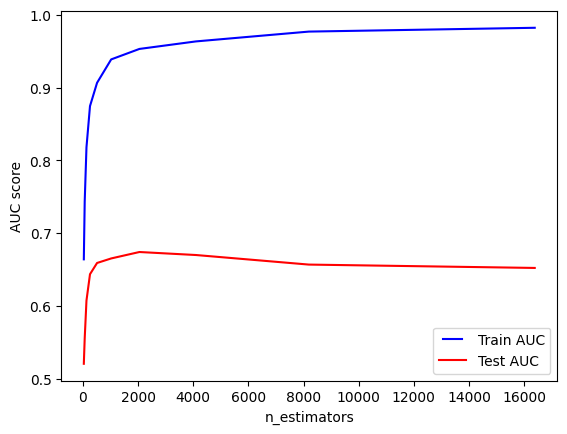

In [9]:
c_values = [2**k for k in range(5, 15)]
# kai k=10, test auksciausias

train_results_nest = []
test_results_nest = []

for estimator in c_values:

     svc = SVC(C=estimator, kernel='rbf')
     svc.fit(X_train_ht, y_train_ht)
     train_pred = svc.predict(X_train_ht)
     false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_ht, train_pred)
     roc_auc = auc(false_positive_rate, true_positive_rate)
     train_results_nest.append(roc_auc)
     y_pred = svc.predict(X_test)
     false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
     roc_auc = auc(false_positive_rate, true_positive_rate)
     test_results_nest.append(roc_auc)

line1, = plt.plot(c_values, train_results_nest, 'b', label='Train AUC')
line2, = plt.plot(c_values, test_results_nest, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()


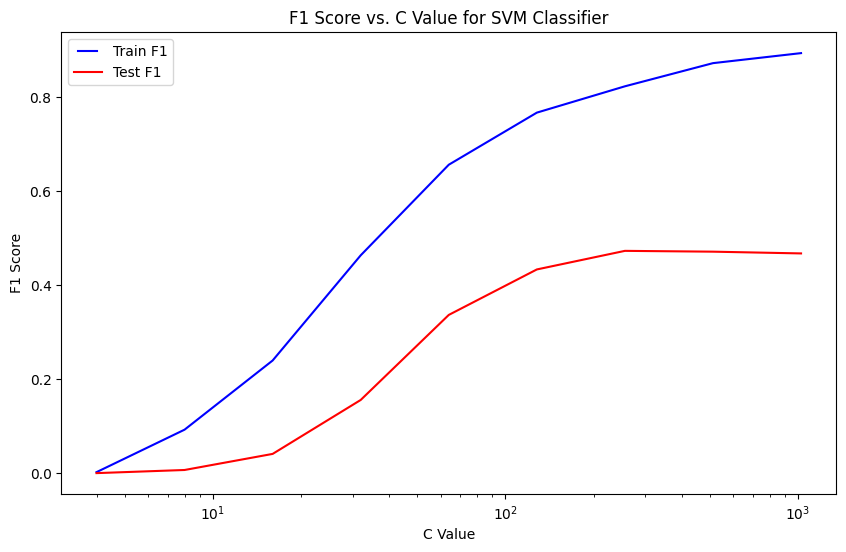

In [14]:
C_values = [2**k for k in range(2, 11)]

train_results_f1 = []
test_results_f1 = []

for C in C_values:

    svc = SVC(C=C, kernel='rbf')
    svc.fit(X_train_ht, y_train_ht)
    

    train_pred = svc.predict(X_train_ht)
    f1 = f1_score(y_train_ht, train_pred)
    train_results_f1.append(f1)
    

    y_pred = svc.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    test_results_f1.append(f1)


plt.figure(figsize=(10, 6))
line1, = plt.plot(C_values, train_results_f1, 'b', label='Train F1')
line2, = plt.plot(C_values, test_results_f1, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('C Value')
plt.title('F1 Score vs. C Value for SVM Classifier')
plt.xscale('log')  
plt.show()


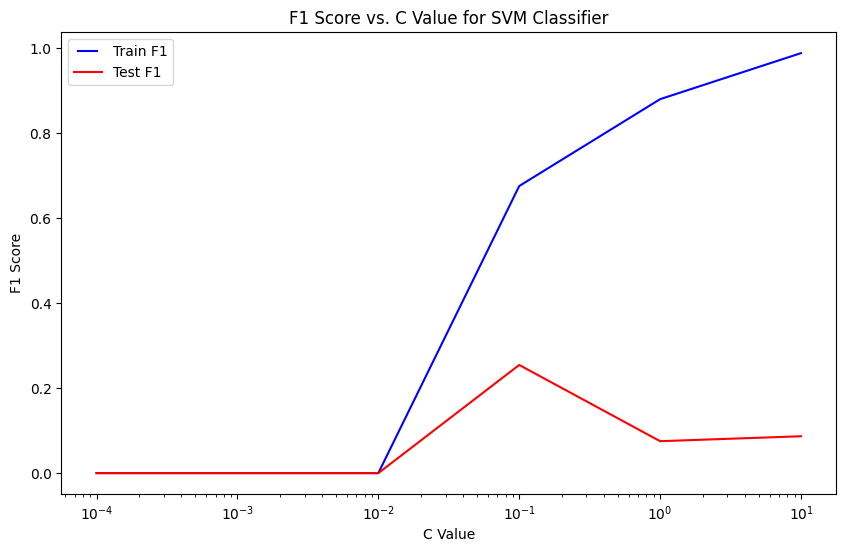

In [19]:
C_values = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]

# kai g=1, test auksciausias

train_results_f1 = []
test_results_f1 = []

for g in C_values:

    svc = SVC(C=100, kernel='rbf', gamma=g)
    svc.fit(X_train_ht, y_train_ht)
    

    train_pred = svc.predict(X_train_ht)
    f1 = f1_score(y_train_ht, train_pred)
    train_results_f1.append(f1)
    

    y_pred = svc.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    test_results_f1.append(f1)


plt.figure(figsize=(10, 6))
line1, = plt.plot(C_values, train_results_f1, 'b', label='Train F1')
line2, = plt.plot(C_values, test_results_f1, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('C Value')
plt.title('F1 Score vs. C Value for SVM Classifier')
plt.xscale('log')  
plt.show()
